# Package

This shows how to create a package and install it locally.

In [1]:
# uv add git+https://github.com/SDPSDPSDPSDPSDPSDP/data-analysis.git --frozen

# Fake Dataset

Collaps this part.

In [2]:
# generate fake datasets

import pandas as pd
import numpy as np
import random
import os

df = pd.DataFrame({
    "label": ["A", "B", "A", "C", "B", "B", "C", "A", "A", "C", "D", "E", "F", "A", "B", "C"],
    "values": [5, 3, 8, 9, 4, 7, 6, 3, 2, 8, 1, 2, 3, 6, 5, 4],
})
df["hue"] = [random.choice(["category_1", "category_2"]) for _ in range(len(df))]
df["label"] = "Label " + df["label"]

# Enlarge the Dataset
original_length = len(df)
multiplier = 10000
df = pd.concat([df] * multiplier, ignore_index=True)

# Ensure more middle values (range: 1-100, higher weights closer to 50)
weights = [100 - abs(50 - x) for x in range(1, 101)]  # Higher weights for middle values
middle_distribution = [random.choices(range(1, 101), weights=weights)[0] for _ in range(len(df))]
df["values"] = middle_distribution

df["hue"] = [random.choice(["category_1", "category_2"]) for _ in range(len(df))]
df['hue2'] = df['hue'] == 'category_1'
# Generate a fake dataset
np.random.seed(42)  # Set a seed for reproducibility

# Create fake data
years = range(2000, 2023)  # Years from 2000 to 2022
cumul_total_docs = np.cumsum(np.random.randint(50, 150, size=len(years)))  # Cumulative document count

# Build the DataFrame
df_documents_by_year = pd.DataFrame({
    'year': years,  # Year values as integers
    'cumul_total_docs': cumul_total_docs  # Cumulative total documents
})

df_documents_by_year

,year,cumul_total_docs
0,2000,101
1,2001,243
2,2002,307
3,2003,428
4,2004,538
5,2005,608
6,2006,740
7,2007,876
8,2008,1000
9,2009,1124


# Examples

This shows how to import the package and use the modules.

## Plotting

In [3]:
from shirin.plot import PlotGraphs, Colors
plot = PlotGraphs(export=False, format='svg')

In [4]:
pd.options.display.max_rows = 100
# pd.options.display.max_cols = 100

### Countplot

#### Y

Countplot Y


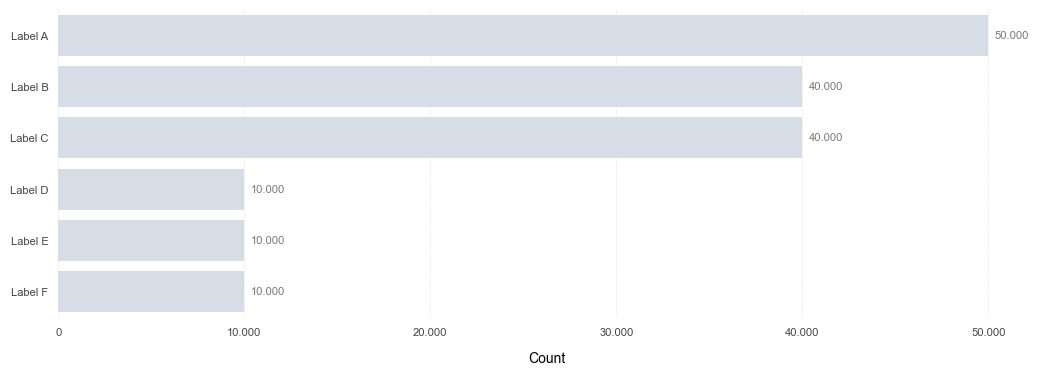

In [5]:
print("Countplot Y")
plot.countplot_y(df, "label")

Stacked Countplot Y with Hue


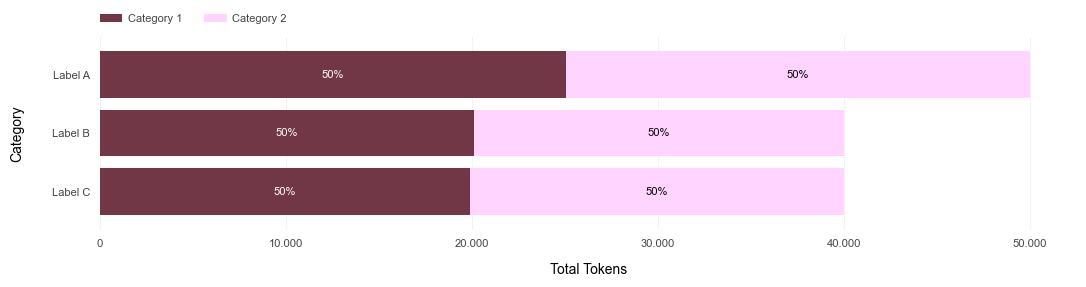

In [6]:
print("Stacked Countplot Y with Hue")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_y(
    df, "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=3, 
    ylabel="Category", 
    xlabel="Total Tokens",
    stacked=True, 
    stacked_labels='standard',
    order_type='alphabetical',
)

Normalized Countplot Y


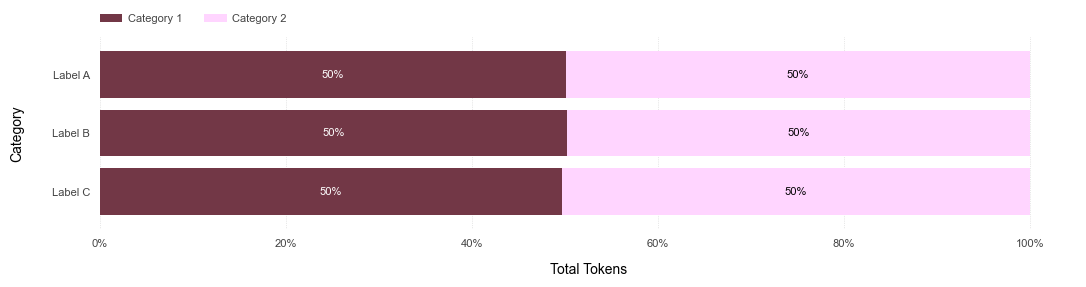

In [7]:
print("Normalized Countplot Y")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_y(
    df, 
    "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=3, 
    ylabel="Category", 
    xlabel="Total Tokens",
    order_type='alphabetical',
    normalized=True
)

#### X

Countplot X


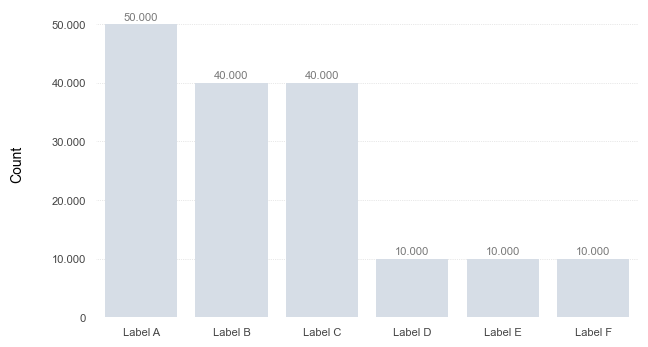

In [8]:
print("Countplot X")
plot.countplot_x(df, "label")

Stacked Countplot X with Hue


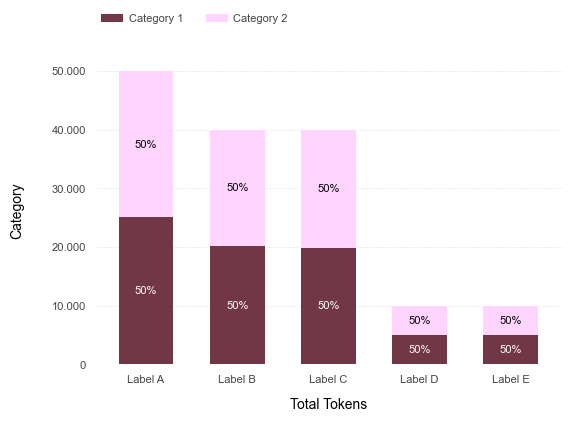

In [9]:
print("Stacked Countplot X with Hue")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_x(
    df, "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=5, 
    ylabel="Category", 
    xlabel="Total Tokens",
    stacked=True, 
    stacked_labels='standard',
    order_type='alphabetical',
)

Normalized Countplot X


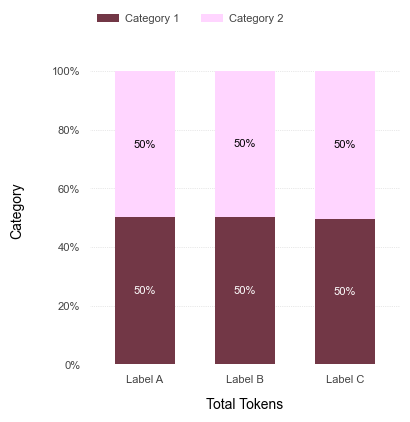

In [10]:
print("Normalized Countplot X")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_x(
    df, 
    "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=3, 
    ylabel="Category", 
    xlabel="Total Tokens",
    order_type='alphabetical',
    normalized=True,
)

### Histogram

Histogram


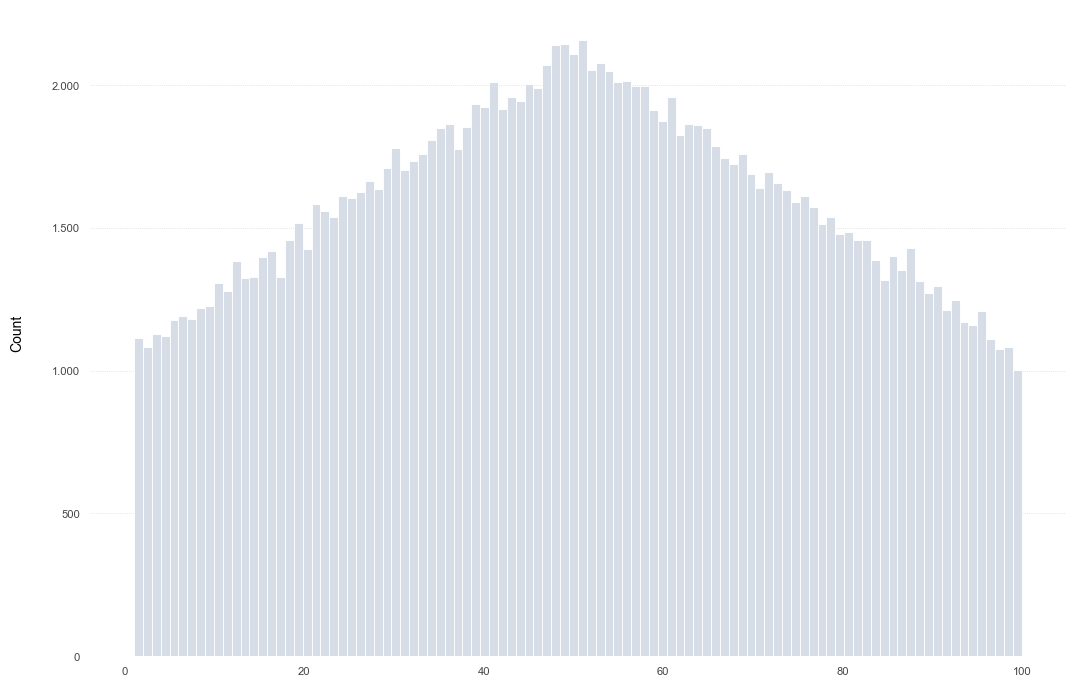

In [11]:
print("Histogram")
plot.histogram(df, "values")

Histogram


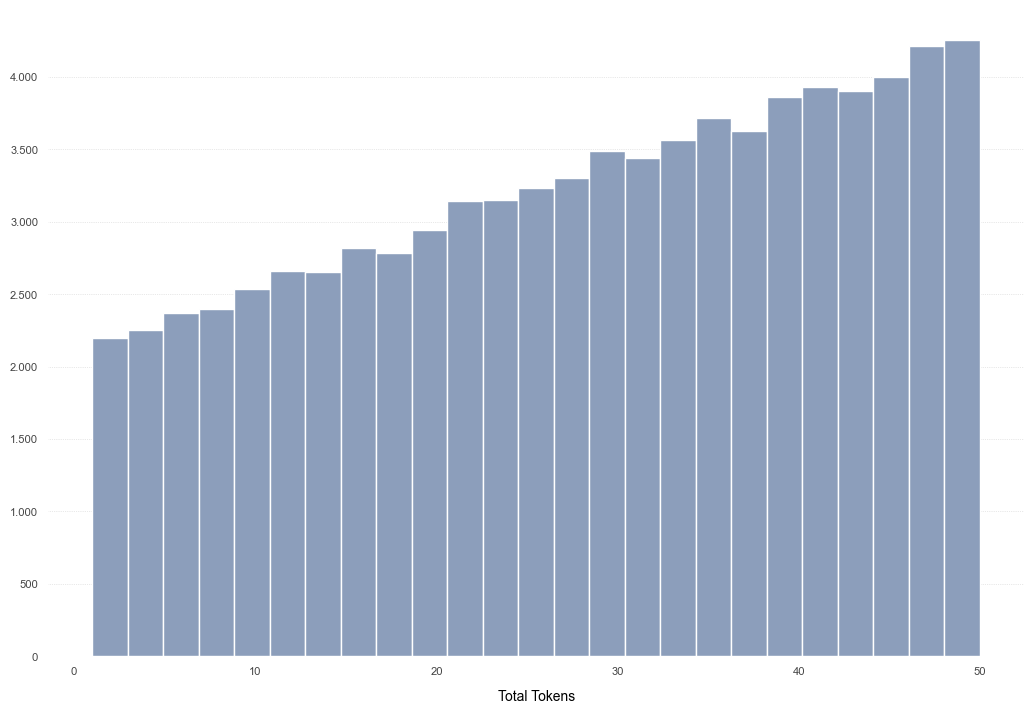

In [12]:
print("Histogram")
plot.histogram(
    df, 
    "values", 
    palette=Colors.DARK_BLUE, 
    xlimit=50, 
    bins=25, 
    xlabel="Total Tokens", 
    ylabel=""
)

Histogram with different Categories


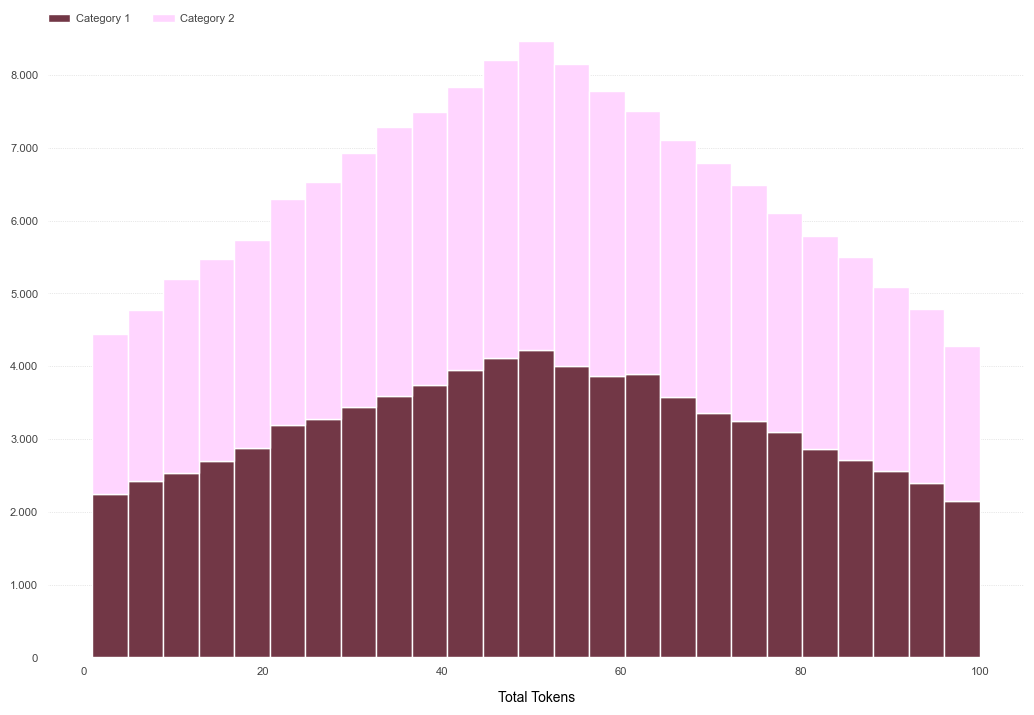

In [13]:
print("Histogram with different Categories")
palette={True: Colors.BROWN, False: Colors.PINK}
label_map={True: "Category 1", False: "Category 2"}
plot.histogram(
    df, 
    "values", 
    xlimit=100, 
    bins=25, 
    xlabel="Total Tokens", 
    ylabel="",
    hue="hue2", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.01, 
    stacked=True
)

### Pie

#### Basic Pie Plot

Basic Pie


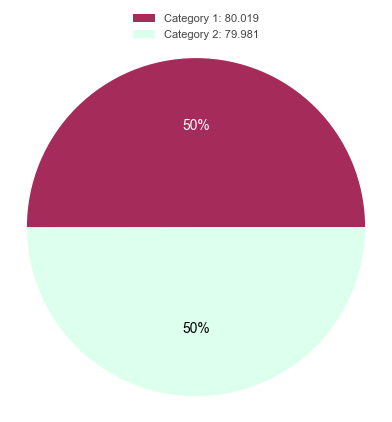

In [14]:
print("Basic Pie")
palette={"category_1": Colors.BAD_RED, "category_2": Colors.GOOD_GREEN}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.pie(
    df, 
    "hue", 
    palette=palette, 
    label_map=label_map, 
    n_after_comma = 0,
    value_datalabel = 5,
    donut=False
)

Basic Donut


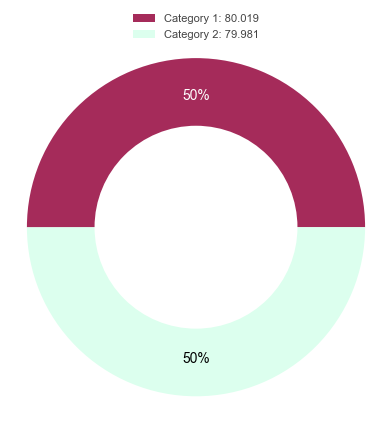

In [15]:
print("Basic Donut")
palette={"category_1": Colors.BAD_RED, "category_2": Colors.GOOD_GREEN}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.pie(
    df, 
    "hue", 
    palette=palette, 
    label_map=label_map, 
    n_after_comma = 0,
    value_datalabel = 5,
    donut=True
)

## Lineplot

Lineplot


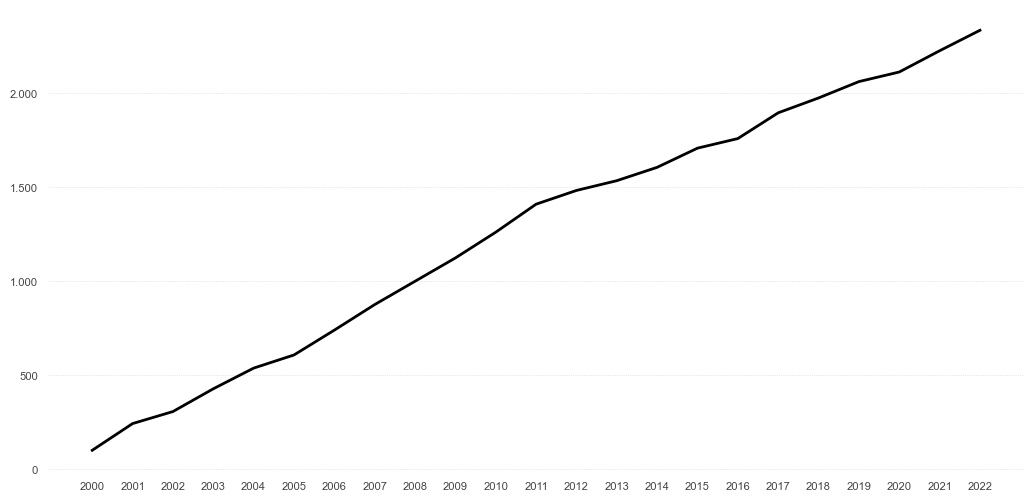

In [16]:
print('Lineplot')
plot.lineplot(df=df_documents_by_year, x='year', y='cumul_total_docs')

Lineplot


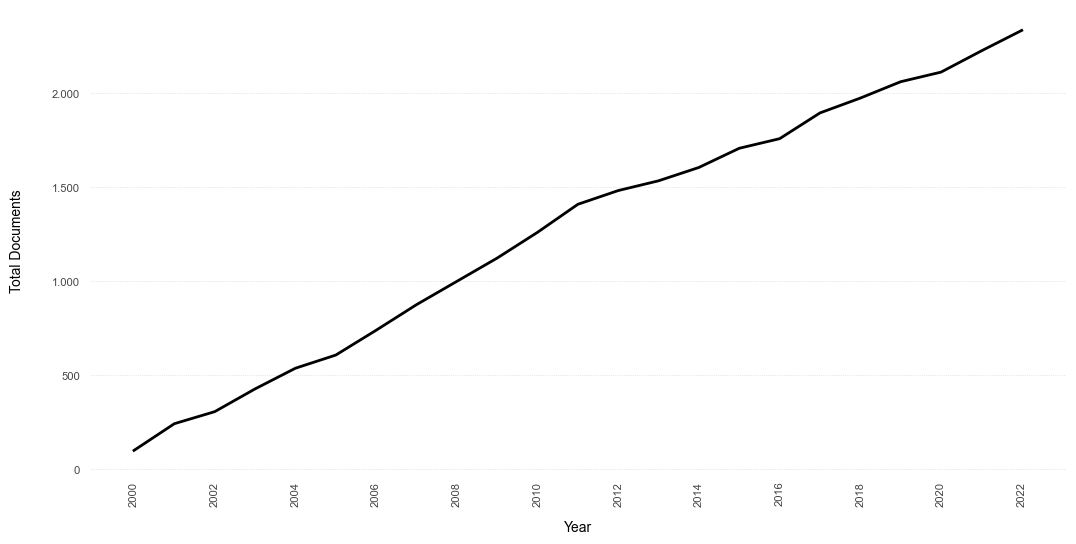

In [17]:
print('Lineplot')
plot.lineplot(
    df=df_documents_by_year, 
    x='year', 
    y='cumul_total_docs', 
    ylabel='Total Documents', 
    xlabel='Year', 
    rotation=90, 
    dynamic_x_ticks=2, 
    fill_missing_values='zero'
) #'shift'

## Statistics

In [18]:
from shirin.stats import print_stats

In [19]:
print_stats(df, 'values')

Mean: 50
Median: 50
Minimum: 1
Maximum: 100


## SQL Query

The input can be either a location to the config/query files or the actual config/query.

In [20]:
%%script echo skipping

from shirin.sql import run_sql_query

db_config = {
    'user': 'username', 
    'password': 'password', 
    'host': 'hostname', 
    'port': 'port', 
    'db_name': 'db_name', 
    'schema': 'schema_name'
}

sql_query = """SELECT * FROM table_name"""

df = run_sql_query(sql_query=sql_query, db_config=db_config)

Couldn't find program: 'echo'


In [21]:
%%script echo skipping

db_config = os.path.join('path.json')
sql_query = os.path.join('path.sql')

df = run_sql_query(sql_query=sql_query, db_config=db_config)

Couldn't find program: 'echo'
